In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("amz_uk.csv")

In [3]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


Frequency Tables:

1. Generate a frequency table for the product category.
2. Which are the top 5 most listed product categories?

Visualizations:

3. Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
   For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [7]:
frequency_table = df['category'].value_counts().head()

frequency_table

# Top listed categories are: sports & outdoors, beauty, handmade merch, bath & body and birthday gifts

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

<Axes: ylabel='count'>

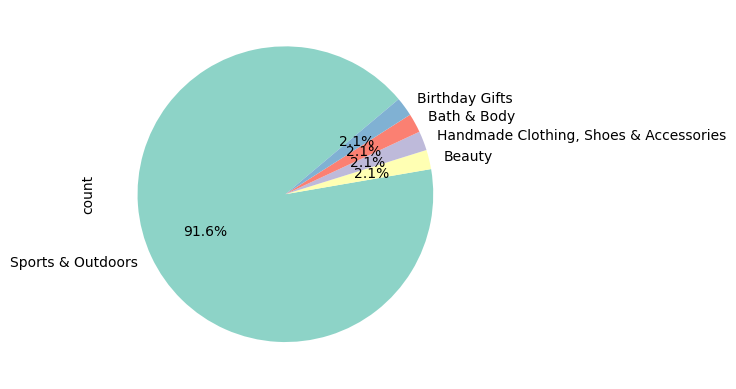

In [18]:
df['category'].value_counts().head().plot.pie(autopct='%1.1f%%', startangle=40, colors=sns.color_palette("Set3"))

# The most dominating category is Sports & Outdoors. 

Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

1. Calculate the mean, median, and mode for the price of products.
2. What's the average price point of products listed? How does this compare with the most common price point (mode)?

Measures of Dispersion:

3. Determine the variance, standard deviation, range, and interquartile range for product price.
4. How varied are the product prices? Are there any indicators of a significant spread in prices?

Visualizations:

5. Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
6. Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [27]:
mean_price = df['price'].mean().round(2)
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

# The avg price point is 89.24, which is almost 9x greater than the most common price point of 9.99.

(89.24, 19.09, 9.99)

In [37]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

# The variance show variety, but the variance is spread out a sginificant amount vs the avg 89.24. According to the std, approx $345. 

(119445.4853225653,
 345.6088617535223,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

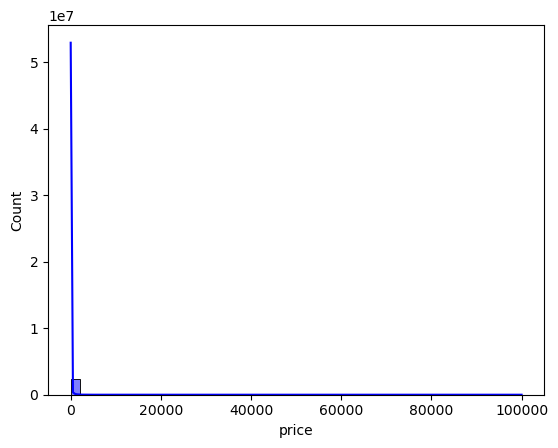

In [46]:
sns.histplot(df['price'], kde=True, bins=50, color="blue")

<Axes: >

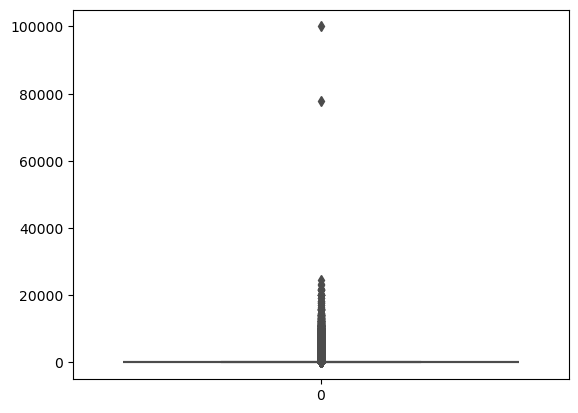

In [49]:
sns.boxplot(data = df['price'], color="blue")

# Here we see two outliers scewing the visuzlization of the histogram. 

Unpacking Product Ratings

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

1. Calculate the mean, median, and mode for the rating of products.
2. How do customers generally rate products? Is there a common trend?

Measures of Dispersion:

3. Determine the variance, standard deviation, and interquartile range for product rating.
4. Are the ratings consistent, or is there a wide variation in customer feedback?

Shape of the Distribution:

5. Calculate the skewness and kurtosis for the rating column.
6. Are the ratings normally distributed, or do they lean towards higher or lower values?

Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


In [50]:
mean_stars = df['stars'].mean().round(2)
median_stars = df['stars'].median()
mode_stars = df['stars'].mode()[0]

mean_stars, median_stars, mode_stars

# Customers either don't rate products at all or they rate them extremely low considering the median/mode are 0.0 and the avg rating is 2.15 stars.

(2.15, 0.0, 0.0)

In [51]:
variance_stars = df['stars'].var()
std_dev_stars = df['stars'].std()
min_stars = df['stars'].min()
max_stars = df['stars'].max()
range_stars = max_stars - min_stars
quantiles_stars = df['stars'].quantile([0.25, 0.5, 0.75])

variance_stars, std_dev_stars, min_stars, max_stars, range_stars, quantiles_stars

# The avg rating is 2.15 stars, so the variance being 4.8 tells me there are outliers. 

(4.81743402976196,
 2.1948653785054697,
 0.0,
 5.0,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

In [52]:
skewness_stars = df['stars'].skew()
kurtosis_stars = df['stars'].kurtosis()

skewness_stars, kurtosis_stars

# The below figures align with my assumpotion of low ratings. 

(0.08120735761080985, -1.9260061280432985)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

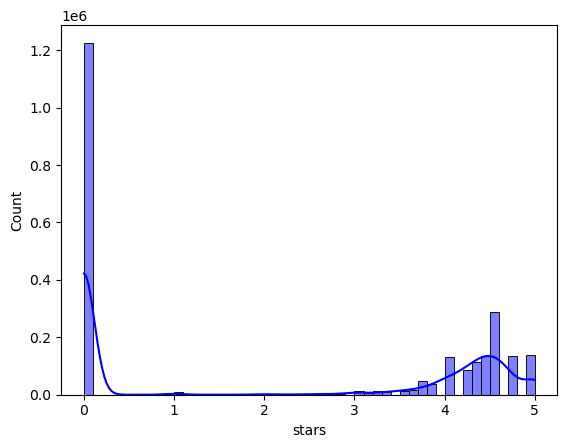

In [53]:
sns.histplot(df['stars'], kde=True, bins=50, color="blue")